# 🏠 Linear Regression Project - Housing Price Prediction

### 📌 Objective:
Use Linear Regression to predict house prices based on various features.

---

### 🛠 Tools & Libraries:
- Python
- Pandas, NumPy
- Scikit-learn
- Google Colab (preferred environment)

---

### 📂 Dataset:
Housing dataset with 13 columns including both numeric and categorical features.

✅ No missing values  
✅ Mixed feature types  
✅ Realistic for urban price modeling

---

### 📊 Real-World Relevance:
Helps estimate home values for buyers, sellers, and agents.


## 📥 Load and Inspect Dataset

In [2]:
import pandas as pd
import io
# Upload CSV file from your local system (only works in Google Colab)
from google.colab import files
uploaded = files.upload()


# Load the uploaded CSV file
df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
df.head()

Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


✅ This displays the first few rows of the dataset.

## 🔍 Explore Dataset Structure

In [4]:
# Info
df.info()

# Description
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 🔎 Summary:
- 545 rows × 13 columns
- No missing data
- Price, area, and rooms are numeric
- Others are categorical and need encoding


## 🔄 Encode Categorical Variables

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


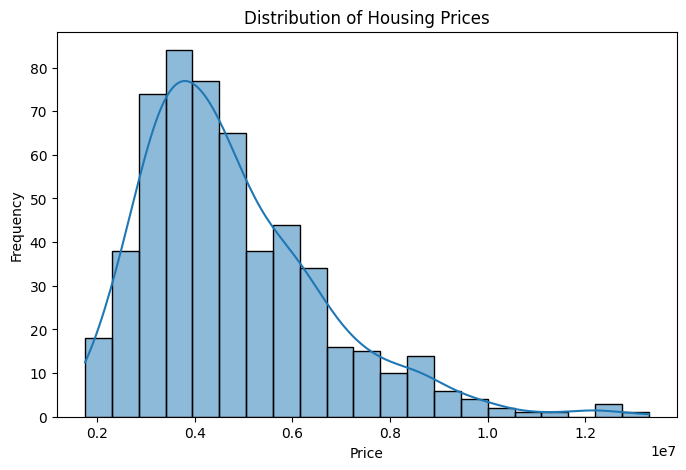

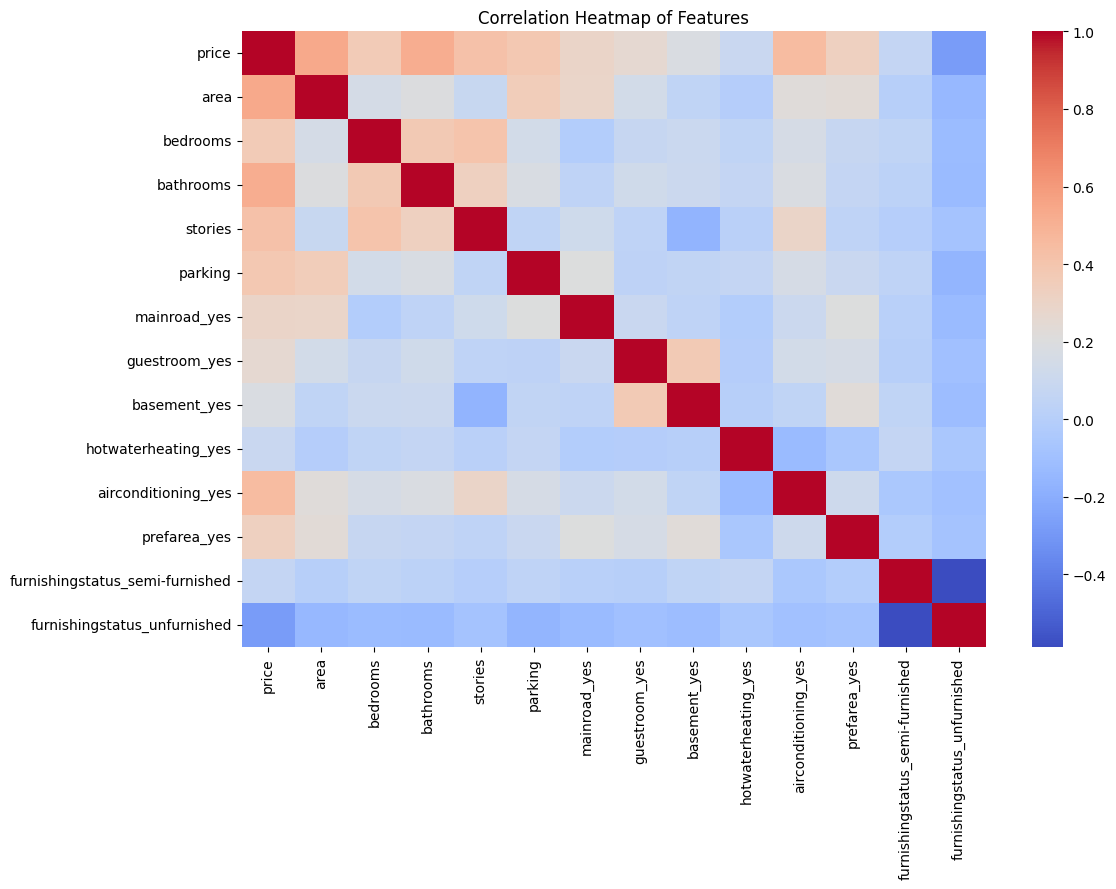

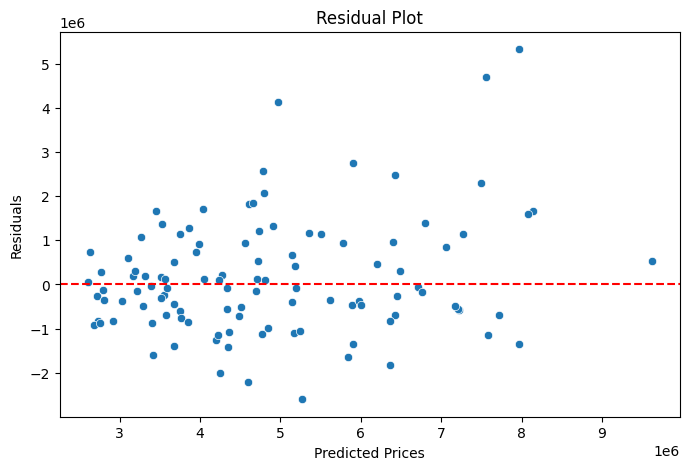

In [12]:
# Distribution of the target variable (price)
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Here’s a **concise yet detailed summary** of the three plots—**Histogram with KDE**, **Correlation Heatmap**, and **Residual Plot**:

---

### 📊 **1. Distribution of Housing Prices (Histogram with KDE)**

**🔍 What It Shows:**

* **Histogram bars** represent how frequently different house price ranges occur.
* **KDE (Kernel Density Estimate)** overlays a smooth curve, showing the estimated distribution of prices.

**✅ Why It’s Useful:**

* Reveals the **common price range** (e.g., most houses fall between ₹X and ₹Y).
* Indicates **distribution shape**: normal, skewed, or multimodal.
* Helps assess the **predictability and stability** of the target variable (`price`).

**📈 Based On:**
`df['price']` — the price column of your dataset.

---

### 🔥 **2. Correlation Heatmap**

**🔍 What It Shows:**

* A matrix of **correlation coefficients** between all pairs of features.
* **Color-coded squares** indicate the strength and direction of relationships:

  * 🔴 Red = strong positive correlation.
  * 🔵 Blue = strong negative correlation.
  * ⚪ White = weak or no correlation.

**✅ Why It’s Useful:**

* Identifies features that **strongly influence house prices**.
* Flags **multicollinearity** (when independent variables are too closely related), which can affect model stability.

**📈 Based On:**
Correlation matrix of `df_encoded` — the encoded and preprocessed dataset.

---

### 📉 **3. Residual Plot**

**🔍 What It Shows:**

* Plots **residuals** (`y_test - y_pred`) against predicted prices (`y_pred`).
* A red dashed line at **y = 0** indicates perfect prediction.

**✅ Why It’s Useful:**

* Tests if model assumptions (like **constant variance of errors**) hold:

  * **Random scatter** around the line → good model fit.
  * **Patterns or curves** → potential model issues like non-linearity or heteroscedasticity.
* Detects **outliers** or large prediction errors.

**📈 Based On:**
`y_pred` and residuals (`y_test - y_pred`) from the linear regression model.


✅ Categorical columns are now one-hot encoded (converted to 0/1 columns).

## 🧪 Split Data into Train and Test Sets

In [6]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((436, 13), (109, 13))

✅ 80% training, 20% testing. Ready to train model.

## 🤖 Train Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

model.intercept_, model.coef_

(np.float64(260032.35760741215),
 array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
         2.24841913e+05,  3.67919948e+05,  2.31610037e+05,  3.90251176e+05,
         6.84649885e+05,  7.91426736e+05,  6.29890565e+05, -1.26881818e+05,
        -4.13645062e+05]))

✅ Model is trained. Intercept and coefficients represent the contribution of each feature.

## 📏 Evaluate Model Performance

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(970043.4039201636,
 1754318687330.6638,
 np.float64(1324506.9600914386),
 0.6529242642153184)

### ✅ Evaluation Metrics:
- **MAE**: Mean error per prediction
- **RMSE**: Typical deviation from actual price
- **R² Score**: ~65% of price variance explained by model


## 📈 Step 7: Visualize Predictions vs Actual
**What & Why:** Let's plot predicted vs. actual values to visually assess model performance.

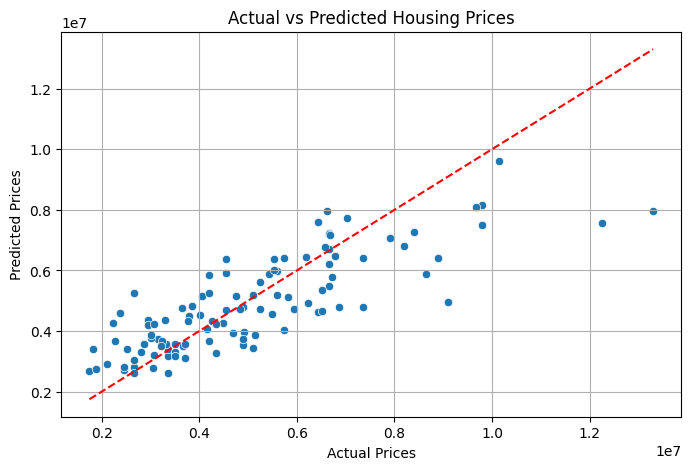

In [10]:
# Scatter plot: Actual vs Predicted prices
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

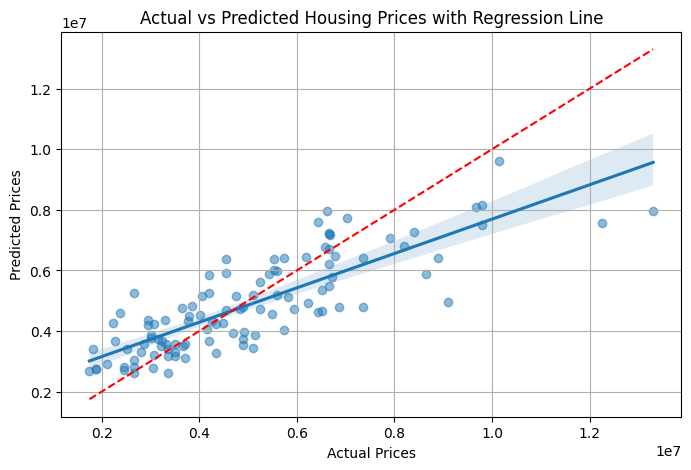

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}) # Use regplot for scatter plot with regression line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices with Regression Line")
# The red dashed line for perfect prediction is also helpful to keep
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

## ✅ What did we learn?
The closer the points lie to the red dashed line (perfect prediction), the better our model performs.

- The **scatter plot and its regression line** show the actual relationship between your model's predictions and the true values.

- The **red dashed "perfect prediction" line** is a visual guide to show what perfect performance would look like, allowing you to compare your model's performance against this ideal.

# 🧾 Final Summary

---

### ✅ What We Did:
- Loaded and inspected housing data
- Encoded categorical features
- Built and evaluated a linear regression model

---

### 🔍 Key Metrics:
- **R² Score**: 0.653
- **MAE**: ₹970,043
- **RMSE**: ₹1.32M

---

### 🚀 Future Improvements:
- Try **Polynomial Regression**
- Add **Regularization** (Ridge/Lasso)
- Normalize/scale features
- Include interaction terms

✅ These are suggested in the provided image hints/objectives.
